Первый контест на Kaggle.
Предсказание цен на квартиру

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize_scalar
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import cross_val_score

Загружаю данные

In [ ]:
train = pd.read_csv("/content/sample_data/train.csv")
test = pd.read_csv("/content/sample_data/test.csv")
true_ans = pd.read_csv("/content/sample_data/sample_submission.csv")
print(test.shape)
print(train.shape)

(3239, 37)
(27232, 38)


In [ ]:
train.head()

,district_area,road_distance_1,road_distance_2,year_of_construction,bulvar_ring_km,bus_station_distance,cafe_count,fitness_center_distance,floor,district_population,...,product_type,public_transport_station_distance,sadovoe_km,base_school_distance,sport_count,state,district_name,timestamp,malls_count,railway_station_distance
0,6.407578e+06,1.422391,3.830951,NaN,13.675657,24.292406,152,0.485841,4.0,86206,...,Investment,3.299822,13.100618,0.177975,52,NaN,Bibirevo,2011-08-20,52,14.231961
1,9.589337e+06,2.887377,3.103996,NaN,8.132640,5.706113,177,0.668364,3.0,76284,...,Investment,0.783160,6.444333,0.273345,66,NaN,Nagatinskij Zaton,2011-08-23,40,9.242586
2,4.808270e+06,0.647250,2.927487,NaN,8.054252,6.710302,122,0.733101,2.0,101982,...,Investment,3.945073,6.963403,0.158072,67,NaN,Tekstil'shhiki,2011-08-27,35,9.540544
3,1.258354e+07,2.677824,2.780449,NaN,18.309433,6.734618,61,0.623484,9.0,21155,...,Investment,1.579164,17.457198,0.236455,26,NaN,Mitino,2011-09-01,22,17.478380
4,8.398461e+06,1.721834,3.133531,NaN,0.787593,1.423428,2283,0.220288,4.0,28179,...,Investment,0.857764,0.046810,0.376838,195,NaN,Basmannoe,2011-09-05,114,1.595898


Предобработка данных

In [ ]:
train.timestamp = pd.to_datetime(train.timestamp, format="%Y-%m-%d")
train['year'] = train.timestamp.dt.year
train['month'] = train.timestamp.dt.month
train['day'] = train.timestamp.dt.day
train.drop(columns=['timestamp'], inplace=True)
train = train.drop(["district_name"], axis=1)
train = train.drop(["id"], axis=1)

Y = train["result_price"]
X = train.drop(columns=["result_price"])
Y_ln = np.log(Y)

In [ ]:
test.timestamp = pd.to_datetime(test.timestamp, format="%Y-%m-%d")
test['year'] = test.timestamp.dt.year
test['month'] = test.timestamp.dt.month
test['day'] = test.timestamp.dt.day
test.drop(columns=['timestamp'], inplace=True)
test = test.drop(["district_name"], axis=1)
test = test.drop(["id"], axis=1)

In [ ]:
print(mean_squared_log_error(Y, np.exp(Y_ln)))

1.3055369887081581e-30


Выполняем проверку качества

In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 13.9 MB/s eta 0:00:00


In [ ]:
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
from catboost import CatBoost, CatBoostRegressor, Pool

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
X_train_ln, X_test_ln, y_train_ln, y_test_ln = train_test_split(X, Y_ln, test_size=0.2, random_state=1)

In [ ]:
lst = []
for i in range(900, 1200, 10):
  cat = CatBoostRegressor(loss_function='RMSE', learning_rate=0.1, n_estimators=i)
  cat.fit(X_train,y_train, cat_features=['product_type'])
  y_proba = cat.predict(X_test)
  lst.append(mean_squared_log_error(y_test, y_proba))

Выходные данные были обрезаны до нескольких последних строк (5000).
850:	learn: 1612709.2460074	total: 7.83s	remaining: 2.75s
851:	learn: 1611902.4083635	total: 7.84s	remaining: 2.74s
852:	learn: 1611263.5948831	total: 7.85s	remaining: 2.73s
853:	learn: 1610770.9048176	total: 7.86s	remaining: 2.72s
854:	learn: 1609961.2665765	total: 7.87s	remaining: 2.71s
855:	learn: 1609497.4278451	total: 7.88s	remaining: 2.71s
856:	learn: 1608851.2057367	total: 7.88s	remaining: 2.69s
857:	learn: 1608435.8897081	total: 7.9s	remaining: 2.69s
858:	learn: 1607718.7368063	total: 7.91s	remaining: 2.68s
859:	learn: 1607051.1229573	total: 7.92s	remaining: 2.67s
860:	learn: 1606464.7718656	total: 7.92s	remaining: 2.66s
861:	learn: 1606256.0305074	total: 7.93s	remaining: 2.65s
862:	learn: 1605938.1531350	total: 7.94s	remaining: 2.64s
863:	learn: 1605535.7780902	total: 7.95s	remaining: 2.63s
864:	learn: 1604767.1821181	total: 7.95s	remaining: 2.62s
865:	learn: 1604031.4190329	total: 7.96s	remaining: 2.61s
866:	

[900, 910, 920, 930, 940, 950, 960, 970, 980, 990, 1000, 1010, 1020, 1030, 1040, 1050, 1060, 1070, 1080, 1090, 1100, 1110, 1120, 1130, 1140, 1150, 1160, 1170, 1180, 1190]


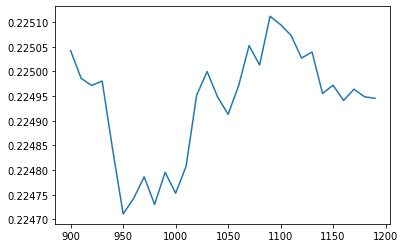

In [ ]:
x_coord = [i for i in range(900, 1200, 10)]
print(x_coord)
plt.plot(x_coord, lst)

In [ ]:
lst = []
for j in np.arange(0.01, 0.3, 0.01):
  cat = CatBoostRegressor(loss_function='RMSE', learning_rate=j, n_estimators=950)
  cat.fit(X_train,y_train, cat_features=['product_type'])
  y_proba = cat.predict(X_test)
  lst.append(mean_squared_log_error(y_test, y_proba))

Выходные данные были обрезаны до нескольких последних строк (5000).
700:	learn: 1454418.9717793	total: 6.77s	remaining: 2.4s
701:	learn: 1454189.9585247	total: 6.78s	remaining: 2.39s
702:	learn: 1453987.0922873	total: 6.78s	remaining: 2.38s
703:	learn: 1453620.9245750	total: 6.79s	remaining: 2.37s
704:	learn: 1452800.3846307	total: 6.8s	remaining: 2.36s
705:	learn: 1451443.5162198	total: 6.81s	remaining: 2.35s
706:	learn: 1451227.9473776	total: 6.81s	remaining: 2.34s
707:	learn: 1450316.6855003	total: 6.82s	remaining: 2.33s
708:	learn: 1449158.5916433	total: 6.83s	remaining: 2.32s
709:	learn: 1448520.8660859	total: 6.84s	remaining: 2.31s
710:	learn: 1447525.3631022	total: 6.85s	remaining: 2.3s
711:	learn: 1446991.8387609	total: 6.86s	remaining: 2.29s
712:	learn: 1446051.1309469	total: 6.87s	remaining: 2.28s
713:	learn: 1445497.1805713	total: 6.87s	remaining: 2.27s
714:	learn: 1444576.7859824	total: 6.88s	remaining: 2.26s
715:	learn: 1443731.7233566	total: 6.89s	remaining: 2.25s
716:	le

ValueError: ignored

21


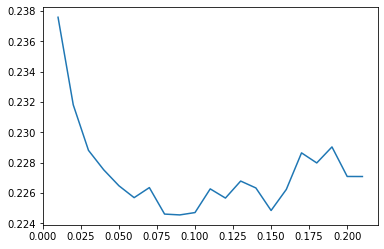

In [ ]:
print(len(lst))
x_coord = [i for i in np.arange(0.01, 0.3, 0.01)]
plt.plot(x_coord[:21], lst)

In [ ]:
cat = CatBoostRegressor(loss_function='RMSE', learning_rate=0.09, n_estimators=950)
cat.fit(X_train, y_train, cat_features=['product_type'])

0:	learn: 4457331.3188069	total: 59.8ms	remaining: 56.8s
1:	learn: 4284714.1231028	total: 70.7ms	remaining: 33.5s
2:	learn: 4118929.8009605	total: 81.6ms	remaining: 25.7s
3:	learn: 3979491.6206693	total: 92ms	remaining: 21.8s
4:	learn: 3853185.8525216	total: 102ms	remaining: 19.3s
5:	learn: 3741800.7131216	total: 114ms	remaining: 18s
6:	learn: 3643803.8063532	total: 125ms	remaining: 16.8s
7:	learn: 3560262.2945377	total: 136ms	remaining: 16s
8:	learn: 3481821.6136595	total: 147ms	remaining: 15.4s
9:	learn: 3413333.1381330	total: 158ms	remaining: 14.8s
10:	learn: 3353158.2870435	total: 168ms	remaining: 14.3s
11:	learn: 3296782.8920375	total: 178ms	remaining: 13.9s
12:	learn: 3246504.2265022	total: 189ms	remaining: 13.6s
13:	learn: 3199622.6188310	total: 200ms	remaining: 13.4s
14:	learn: 3160467.7567325	total: 210ms	remaining: 13.1s
15:	learn: 3126308.2148121	total: 220ms	remaining: 12.8s
16:	learn: 3093464.6209461	total: 232ms	remaining: 12.7s
17:	learn: 3061241.6775343	total: 241ms	rem

In [ ]:
y_proba = cat.predict(X_test)

In [ ]:
print(mean_squared_log_error(y_test, y_proba))

0.22455624677407762


In [ ]:
cat = CatBoostRegressor(loss_function='RMSE', learning_rate=0.1, n_estimators=950)
cat.fit(X_train_ln, y_train_ln, cat_features=['product_type'])

0:	learn: 0.5875210	total: 32.9ms	remaining: 31.2s
1:	learn: 0.5733905	total: 62.3ms	remaining: 29.5s
2:	learn: 0.5612132	total: 90.6ms	remaining: 28.6s
3:	learn: 0.5507365	total: 120ms	remaining: 28.5s
4:	learn: 0.5425587	total: 158ms	remaining: 29.8s
5:	learn: 0.5347066	total: 189ms	remaining: 29.7s
6:	learn: 0.5281018	total: 215ms	remaining: 29s
7:	learn: 0.5227545	total: 252ms	remaining: 29.7s
8:	learn: 0.5178343	total: 287ms	remaining: 30s
9:	learn: 0.5136315	total: 318ms	remaining: 29.9s
10:	learn: 0.5099697	total: 343ms	remaining: 29.3s
11:	learn: 0.5067319	total: 373ms	remaining: 29.1s
12:	learn: 0.5038252	total: 405ms	remaining: 29.2s
13:	learn: 0.5013415	total: 441ms	remaining: 29.5s
14:	learn: 0.4991814	total: 474ms	remaining: 29.6s
15:	learn: 0.4972810	total: 506ms	remaining: 29.6s
16:	learn: 0.4954813	total: 533ms	remaining: 29.3s
17:	learn: 0.4938201	total: 558ms	remaining: 28.9s
18:	learn: 0.4922860	total: 588ms	remaining: 28.8s
19:	learn: 0.4911583	total: 618ms	remainin

In [ ]:
y_proba_ln = cat.predict(X_test_ln)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
print(mean_squared_error(y_test_ln, y_proba_ln))

0.21841860851384298


Сохраняем результат для теста

In [ ]:
cat.fit(X, Y, cat_features=['product_type'])

0:	learn: 4436011.0014093	total: 12.6ms	remaining: 12s
1:	learn: 4233835.4505599	total: 25.2ms	remaining: 11.9s
2:	learn: 4056116.0675921	total: 36.8ms	remaining: 11.6s
3:	learn: 3904886.7754117	total: 48.6ms	remaining: 11.5s
4:	learn: 3766419.8253079	total: 59.9ms	remaining: 11.3s
5:	learn: 3650458.3472312	total: 71.9ms	remaining: 11.3s
6:	learn: 3545447.2777864	total: 83.5ms	remaining: 11.2s
7:	learn: 3457311.4913925	total: 95ms	remaining: 11.2s
8:	learn: 3383197.6419477	total: 107ms	remaining: 11.2s
9:	learn: 3315213.0269535	total: 119ms	remaining: 11.1s
10:	learn: 3256967.7602342	total: 130ms	remaining: 11.1s
11:	learn: 3203864.2441684	total: 140ms	remaining: 10.9s
12:	learn: 3157975.1171267	total: 151ms	remaining: 10.9s
13:	learn: 3117401.0398591	total: 164ms	remaining: 10.9s
14:	learn: 3080327.0832461	total: 176ms	remaining: 11s
15:	learn: 3047040.9773827	total: 188ms	remaining: 11s
16:	learn: 3019152.9323407	total: 199ms	remaining: 10.9s
17:	learn: 2995202.4018668	total: 216ms	r

In [ ]:
y_final = cat.predict(test)

In [ ]:
true_ans.head()

,id,result_price
0,27235,64104
1,27236,9746
2,27237,17640
3,27238,40390
4,27239,76229


In [ ]:
true_ans['result_price'] = y_final
true_ans = true_ans.set_index('id')

In [ ]:
true_ans.head()

,result_price
id,
27235,4.896844e+06
27236,4.512865e+06
27237,8.513505e+06
27238,5.115294e+06
27239,9.562298e+06


In [ ]:
from google.colab import files

In [ ]:
true_ans.to_csv('output.csv', encoding = 'utf-8-sig') 
files.download('output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>